In [20]:
# import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [28]:
# import dataset
mnist = keras.datasets.mnist

(tX, ty), (vX, vy) = mnist.load_data()

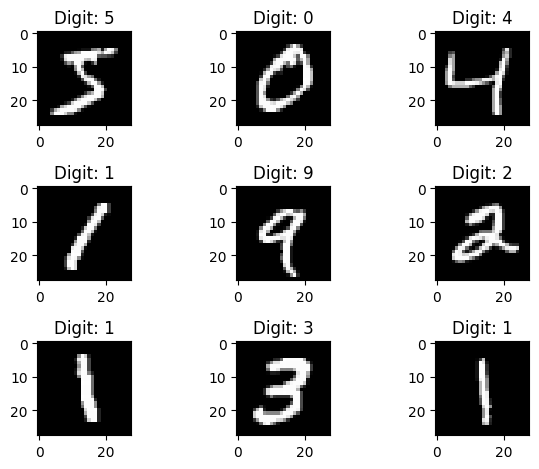

In [31]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(tX[i], cmap='gray')
  plt.title("Digit: {}".format(ty[i]))

In [29]:
# normalizing pixel values

tX = tX.astype('float32')/255
vX = vX.astype('float32')/255

In [32]:
# checking image format

from keras import backend as k

img_row, img_col = 28, 28

# check for channels first
if k.image_data_format() == 'channels_first':

  tX = tX.reshape(tX.shape[0], 1, img_row, img_col)
  vX = vX.reshape(vX.shape[0], 1, img_row, img_col)
  imgpx = (1, img_row, img_col)

else:

  tX = tX.reshape(tX.shape[0], img_row, img_col, 1)
  vX = vX.reshape(vX.shape[0], img_row, img_col, 1)
  imgpx = (img_row, img_col, 1)

In [33]:
# convert the ty and vy to categorical variables so just like label encoding

ty = tf.keras.utils.to_categorical(ty)
vy = tf.keras.utils.to_categorical(vy)

In [47]:
# model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

model = keras.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=imgpx))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# Train the model
model_log = model.fit(tX, ty, batch_size=64, epochs=10, validation_data=(vX, vy))

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.2182 - accuracy: 0.9333 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0408 - val_accuracy: 0.9864
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0314 - val_accuracy: 0.9885
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0315 - val_accuracy: 0.9889
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0289 - val_accuracy: 0.9894
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 

In [50]:
score = model.evaluate(vX, vy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028431273996829987
Test accuracy: 0.9921000003814697


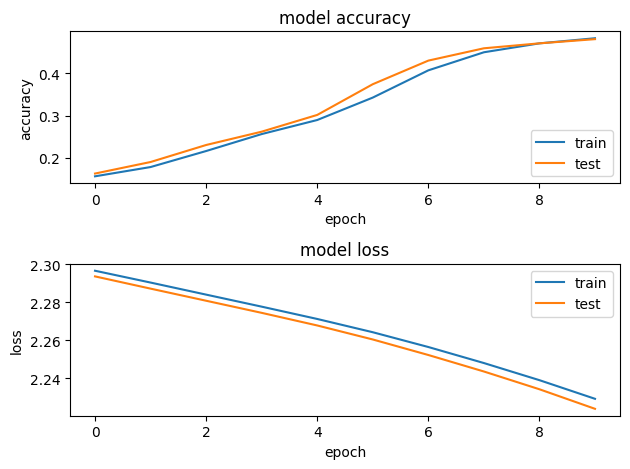

In [40]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()